## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  35.171080   234.572827  0.236010   9.894884  0.922395
1  99.837543   278.375016  0.577273   1.685520  1.073763
2  83.396832  1010.218727  0.921460  10.785175  1.444743
3  38.931383   814.958784  0.576404   4.907638  1.481964
4  47.298644  1093.035906  0.462272   5.585784  1.587339


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 0.9134739	total: 61.5ms	remaining: 1m 1s
1:	learn: 0.9038858	total: 62.1ms	remaining: 31s
2:	learn: 0.8950608	total: 62.6ms	remaining: 20.8s
3:	learn: 0.8866025	total: 63.6ms	remaining: 15.8s
4:	learn: 0.8778470	total: 64.4ms	remaining: 12.8s
5:	learn: 0.8680479	total: 65.7ms	remaining: 10.9s
6:	learn: 0.8593530	total: 66.9ms	remaining: 9.49s
7:	learn: 0.8528159	total: 68ms	remaining: 8.43s
8:	learn: 0.8455132	total: 68.8ms	remaining: 7.57s
9:	learn: 0.8373224	total: 69.8ms	remaining: 6.91s
10:	learn: 0.8289623	total: 70.7ms	remaining: 6.36s
11:	learn: 0.8208237	total: 71.2ms	remaining: 5.86s
12:	learn: 0.8126202	total: 72ms	remaining: 5.47s
13:	learn: 0.8053240	total: 73.3ms	remaining: 5.16s
14:	learn: 0.7964605	total: 74.3ms	remaining: 4.88s
15:	learn: 0.7887820	total: 75.9ms	remaining: 4.67s
16:	learn: 0.7811106	total: 77.1ms	remaining: 4.46s
17:	learn: 0.7729857	total: 77.7ms	remaining: 4.24s
18:	learn: 0.7670587	total: 78.4ms	remaining: 4.04s
19:	learn: 0.7591075	total: 

125:	learn: 0.3277914	total: 161ms	remaining: 1.11s
126:	learn: 0.3256876	total: 162ms	remaining: 1.11s
127:	learn: 0.3236370	total: 162ms	remaining: 1.1s
128:	learn: 0.3216256	total: 163ms	remaining: 1.1s
129:	learn: 0.3199305	total: 164ms	remaining: 1.1s
130:	learn: 0.3179270	total: 165ms	remaining: 1.09s
131:	learn: 0.3158690	total: 165ms	remaining: 1.09s
132:	learn: 0.3136188	total: 166ms	remaining: 1.08s
133:	learn: 0.3115292	total: 167ms	remaining: 1.08s
134:	learn: 0.3094327	total: 168ms	remaining: 1.07s
135:	learn: 0.3076687	total: 168ms	remaining: 1.07s
136:	learn: 0.3059845	total: 169ms	remaining: 1.06s
137:	learn: 0.3045760	total: 170ms	remaining: 1.06s
138:	learn: 0.3029238	total: 171ms	remaining: 1.06s
139:	learn: 0.3011213	total: 171ms	remaining: 1.05s
140:	learn: 0.2995939	total: 172ms	remaining: 1.05s
141:	learn: 0.2977956	total: 173ms	remaining: 1.04s
142:	learn: 0.2959472	total: 173ms	remaining: 1.04s
143:	learn: 0.2945329	total: 174ms	remaining: 1.03s
144:	learn: 0.2

174:	learn: 0.2511400	total: 208ms	remaining: 981ms
175:	learn: 0.2495497	total: 209ms	remaining: 979ms
176:	learn: 0.2485055	total: 210ms	remaining: 978ms
177:	learn: 0.2471752	total: 211ms	remaining: 975ms
178:	learn: 0.2461836	total: 212ms	remaining: 971ms
179:	learn: 0.2449765	total: 212ms	remaining: 968ms
180:	learn: 0.2436076	total: 213ms	remaining: 965ms
181:	learn: 0.2425589	total: 214ms	remaining: 962ms
182:	learn: 0.2415363	total: 215ms	remaining: 958ms
183:	learn: 0.2402209	total: 215ms	remaining: 955ms
184:	learn: 0.2390215	total: 216ms	remaining: 952ms
185:	learn: 0.2380177	total: 217ms	remaining: 949ms
186:	learn: 0.2367183	total: 218ms	remaining: 946ms
187:	learn: 0.2353621	total: 218ms	remaining: 943ms
188:	learn: 0.2341338	total: 219ms	remaining: 940ms
189:	learn: 0.2334488	total: 219ms	remaining: 936ms
190:	learn: 0.2320567	total: 220ms	remaining: 931ms
191:	learn: 0.2307482	total: 221ms	remaining: 931ms
192:	learn: 0.2298165	total: 223ms	remaining: 933ms
193:	learn: 

294:	learn: 0.1552066	total: 313ms	remaining: 747ms
295:	learn: 0.1550092	total: 315ms	remaining: 750ms
296:	learn: 0.1547286	total: 316ms	remaining: 748ms
297:	learn: 0.1544430	total: 317ms	remaining: 746ms
298:	learn: 0.1542360	total: 318ms	remaining: 744ms
299:	learn: 0.1537661	total: 318ms	remaining: 742ms
300:	learn: 0.1535771	total: 319ms	remaining: 740ms
301:	learn: 0.1533642	total: 319ms	remaining: 738ms
302:	learn: 0.1527709	total: 320ms	remaining: 736ms
303:	learn: 0.1523175	total: 321ms	remaining: 734ms
304:	learn: 0.1521201	total: 321ms	remaining: 732ms
305:	learn: 0.1519253	total: 322ms	remaining: 730ms
306:	learn: 0.1517482	total: 323ms	remaining: 729ms
307:	learn: 0.1515580	total: 323ms	remaining: 726ms
308:	learn: 0.1510961	total: 324ms	remaining: 724ms
309:	learn: 0.1507300	total: 324ms	remaining: 722ms
310:	learn: 0.1502463	total: 325ms	remaining: 720ms
311:	learn: 0.1500613	total: 326ms	remaining: 719ms
312:	learn: 0.1498922	total: 326ms	remaining: 717ms
313:	learn: 

349:	learn: 0.1367025	total: 361ms	remaining: 671ms
350:	learn: 0.1361166	total: 363ms	remaining: 671ms
351:	learn: 0.1359852	total: 364ms	remaining: 670ms
352:	learn: 0.1358395	total: 364ms	remaining: 668ms
353:	learn: 0.1357116	total: 365ms	remaining: 666ms
354:	learn: 0.1354783	total: 366ms	remaining: 665ms
355:	learn: 0.1353532	total: 366ms	remaining: 663ms
356:	learn: 0.1348209	total: 367ms	remaining: 661ms
357:	learn: 0.1346968	total: 368ms	remaining: 660ms
358:	learn: 0.1341802	total: 368ms	remaining: 658ms
359:	learn: 0.1340576	total: 369ms	remaining: 656ms
360:	learn: 0.1339360	total: 370ms	remaining: 655ms
361:	learn: 0.1338159	total: 370ms	remaining: 653ms
362:	learn: 0.1336974	total: 371ms	remaining: 651ms
363:	learn: 0.1328601	total: 372ms	remaining: 649ms
364:	learn: 0.1320377	total: 372ms	remaining: 648ms
365:	learn: 0.1316569	total: 374ms	remaining: 647ms
366:	learn: 0.1312819	total: 375ms	remaining: 646ms
367:	learn: 0.1304793	total: 376ms	remaining: 645ms
368:	learn: 

477:	learn: 0.0912164	total: 470ms	remaining: 514ms
478:	learn: 0.0909329	total: 472ms	remaining: 513ms
479:	learn: 0.0906545	total: 473ms	remaining: 512ms
480:	learn: 0.0904602	total: 473ms	remaining: 510ms
481:	learn: 0.0900905	total: 474ms	remaining: 509ms
482:	learn: 0.0898314	total: 475ms	remaining: 508ms
483:	learn: 0.0897788	total: 475ms	remaining: 507ms
484:	learn: 0.0897478	total: 476ms	remaining: 505ms
485:	learn: 0.0894491	total: 476ms	remaining: 504ms
486:	learn: 0.0892030	total: 477ms	remaining: 503ms
487:	learn: 0.0889662	total: 478ms	remaining: 502ms
488:	learn: 0.0887797	total: 479ms	remaining: 500ms
489:	learn: 0.0884894	total: 479ms	remaining: 499ms
490:	learn: 0.0882576	total: 480ms	remaining: 498ms
491:	learn: 0.0880295	total: 481ms	remaining: 496ms
492:	learn: 0.0878490	total: 481ms	remaining: 495ms
493:	learn: 0.0875666	total: 481ms	remaining: 493ms
494:	learn: 0.0872961	total: 482ms	remaining: 492ms
495:	learn: 0.0870202	total: 483ms	remaining: 491ms
496:	learn: 

538:	learn: 0.0793223	total: 517ms	remaining: 442ms
539:	learn: 0.0791972	total: 518ms	remaining: 441ms
540:	learn: 0.0791735	total: 519ms	remaining: 440ms
541:	learn: 0.0790558	total: 519ms	remaining: 439ms
542:	learn: 0.0787690	total: 520ms	remaining: 438ms
543:	learn: 0.0787454	total: 521ms	remaining: 436ms
544:	learn: 0.0786121	total: 521ms	remaining: 435ms
545:	learn: 0.0784897	total: 522ms	remaining: 434ms
546:	learn: 0.0784665	total: 522ms	remaining: 432ms
547:	learn: 0.0781846	total: 523ms	remaining: 431ms
548:	learn: 0.0780636	total: 524ms	remaining: 430ms
549:	learn: 0.0780405	total: 524ms	remaining: 429ms
550:	learn: 0.0779267	total: 525ms	remaining: 428ms
551:	learn: 0.0777680	total: 525ms	remaining: 426ms
552:	learn: 0.0777453	total: 528ms	remaining: 427ms
553:	learn: 0.0774405	total: 529ms	remaining: 426ms
554:	learn: 0.0772942	total: 531ms	remaining: 425ms
555:	learn: 0.0771509	total: 532ms	remaining: 425ms
556:	learn: 0.0771286	total: 532ms	remaining: 423ms
557:	learn: 

662:	learn: 0.0595975	total: 626ms	remaining: 318ms
663:	learn: 0.0593646	total: 627ms	remaining: 317ms
664:	learn: 0.0591152	total: 628ms	remaining: 316ms
665:	learn: 0.0588954	total: 629ms	remaining: 315ms
666:	learn: 0.0587590	total: 629ms	remaining: 314ms
667:	learn: 0.0586523	total: 630ms	remaining: 313ms
668:	learn: 0.0585385	total: 631ms	remaining: 312ms
669:	learn: 0.0582619	total: 631ms	remaining: 311ms
670:	learn: 0.0581140	total: 632ms	remaining: 310ms
671:	learn: 0.0579615	total: 632ms	remaining: 309ms
672:	learn: 0.0578094	total: 633ms	remaining: 308ms
673:	learn: 0.0577329	total: 634ms	remaining: 307ms
674:	learn: 0.0575506	total: 635ms	remaining: 306ms
675:	learn: 0.0573133	total: 635ms	remaining: 304ms
676:	learn: 0.0571348	total: 636ms	remaining: 304ms
677:	learn: 0.0569869	total: 637ms	remaining: 302ms
678:	learn: 0.0568130	total: 637ms	remaining: 301ms
679:	learn: 0.0566938	total: 638ms	remaining: 300ms
680:	learn: 0.0566149	total: 639ms	remaining: 299ms
681:	learn: 

709:	learn: 0.0526848	total: 674ms	remaining: 275ms
710:	learn: 0.0525489	total: 675ms	remaining: 274ms
711:	learn: 0.0524021	total: 676ms	remaining: 273ms
712:	learn: 0.0522687	total: 677ms	remaining: 272ms
713:	learn: 0.0521908	total: 678ms	remaining: 271ms
714:	learn: 0.0520654	total: 678ms	remaining: 270ms
715:	learn: 0.0519323	total: 679ms	remaining: 269ms
716:	learn: 0.0518553	total: 680ms	remaining: 268ms
717:	learn: 0.0517236	total: 680ms	remaining: 267ms
718:	learn: 0.0515924	total: 681ms	remaining: 266ms
719:	learn: 0.0513940	total: 685ms	remaining: 266ms
720:	learn: 0.0512649	total: 686ms	remaining: 265ms
721:	learn: 0.0511241	total: 686ms	remaining: 264ms
722:	learn: 0.0509971	total: 687ms	remaining: 263ms
723:	learn: 0.0508034	total: 688ms	remaining: 262ms
724:	learn: 0.0506658	total: 690ms	remaining: 262ms
725:	learn: 0.0505343	total: 691ms	remaining: 261ms
726:	learn: 0.0504607	total: 692ms	remaining: 260ms
727:	learn: 0.0503229	total: 693ms	remaining: 259ms
728:	learn: 

829:	learn: 0.0380365	total: 781ms	remaining: 160ms
830:	learn: 0.0379844	total: 783ms	remaining: 159ms
831:	learn: 0.0379314	total: 784ms	remaining: 158ms
832:	learn: 0.0378667	total: 784ms	remaining: 157ms
833:	learn: 0.0376607	total: 785ms	remaining: 156ms
834:	learn: 0.0375969	total: 786ms	remaining: 155ms
835:	learn: 0.0373946	total: 786ms	remaining: 154ms
836:	learn: 0.0372521	total: 787ms	remaining: 153ms
837:	learn: 0.0371679	total: 788ms	remaining: 152ms
838:	learn: 0.0371176	total: 788ms	remaining: 151ms
839:	learn: 0.0369782	total: 789ms	remaining: 150ms
840:	learn: 0.0368965	total: 790ms	remaining: 149ms
841:	learn: 0.0368383	total: 791ms	remaining: 148ms
842:	learn: 0.0367893	total: 792ms	remaining: 147ms
843:	learn: 0.0367320	total: 792ms	remaining: 146ms
844:	learn: 0.0365467	total: 793ms	remaining: 145ms
845:	learn: 0.0365091	total: 794ms	remaining: 144ms
846:	learn: 0.0364626	total: 794ms	remaining: 144ms
847:	learn: 0.0364059	total: 795ms	remaining: 143ms
848:	learn: 

893:	learn: 0.0328648	total: 830ms	remaining: 98.4ms
894:	learn: 0.0328140	total: 831ms	remaining: 97.5ms
895:	learn: 0.0327639	total: 832ms	remaining: 96.5ms
896:	learn: 0.0327187	total: 832ms	remaining: 95.6ms
897:	learn: 0.0326693	total: 833ms	remaining: 94.6ms
898:	learn: 0.0326018	total: 834ms	remaining: 93.7ms
899:	learn: 0.0325575	total: 834ms	remaining: 92.7ms
900:	learn: 0.0325138	total: 835ms	remaining: 91.7ms
901:	learn: 0.0324545	total: 836ms	remaining: 90.8ms
902:	learn: 0.0324058	total: 837ms	remaining: 89.9ms
903:	learn: 0.0322675	total: 837ms	remaining: 88.9ms
904:	learn: 0.0322247	total: 838ms	remaining: 88ms
905:	learn: 0.0320715	total: 839ms	remaining: 87ms
906:	learn: 0.0320029	total: 840ms	remaining: 86.1ms
907:	learn: 0.0319351	total: 840ms	remaining: 85.1ms
908:	learn: 0.0318682	total: 841ms	remaining: 84.2ms
909:	learn: 0.0317333	total: 842ms	remaining: 83.3ms
910:	learn: 0.0317108	total: 842ms	remaining: 82.3ms
911:	learn: 0.0316686	total: 843ms	remaining: 81.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4564205893932421


ABC Pre-generator MAE 0.4197107917685875


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

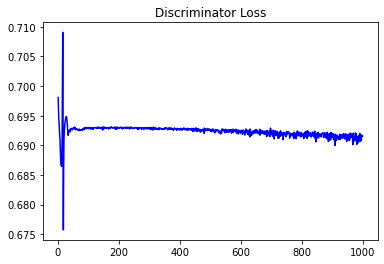

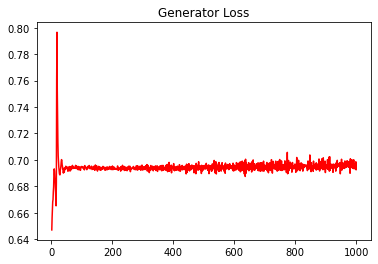

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.48308056104462593


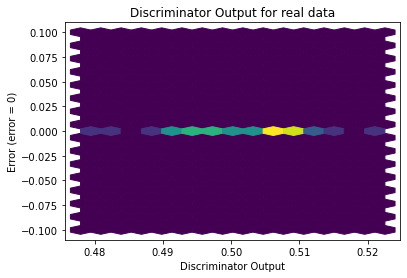

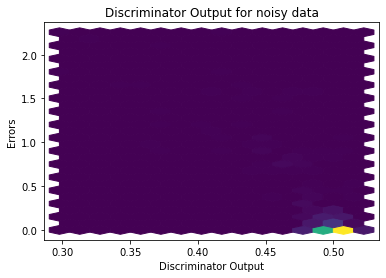

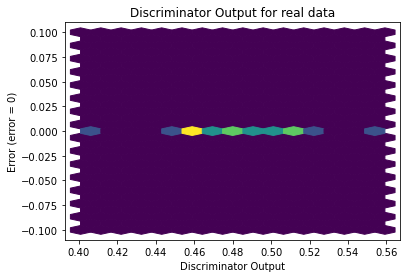

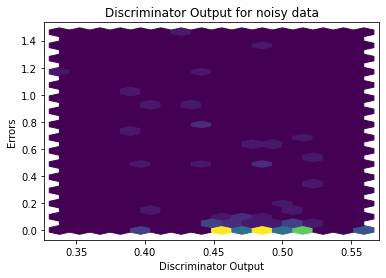

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

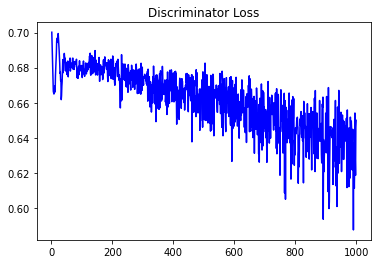

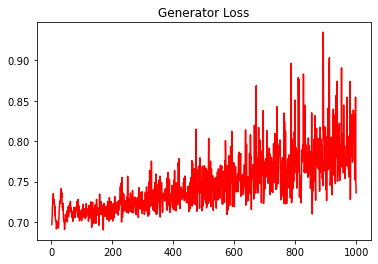

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.3685813716067933


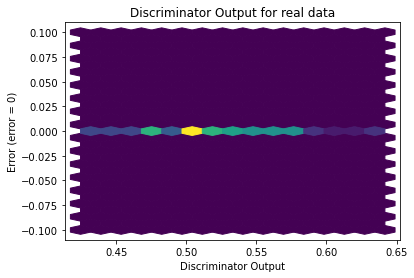

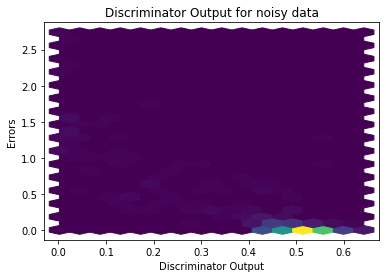

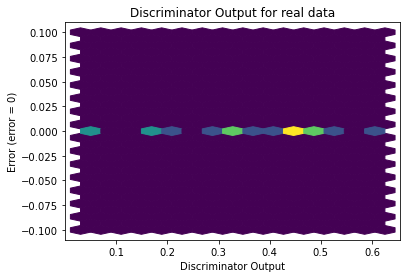

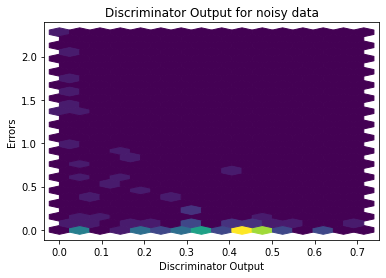

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


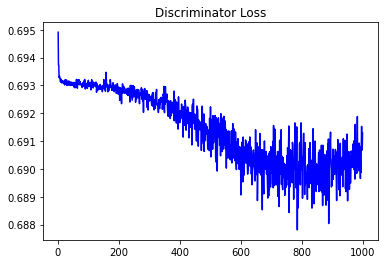

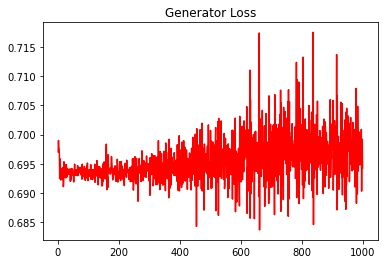

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.45139539245003835


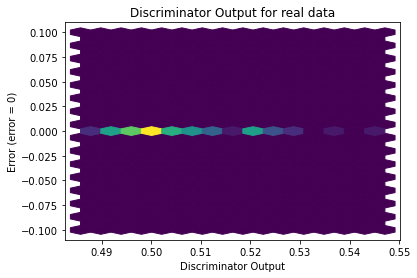

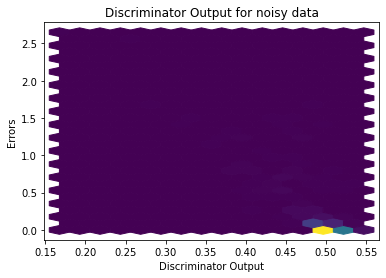

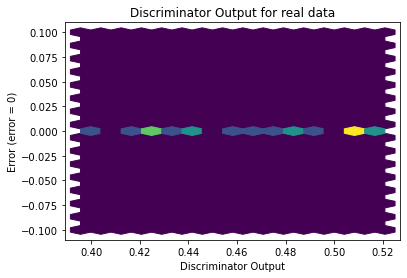

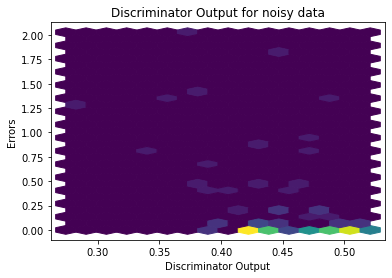

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


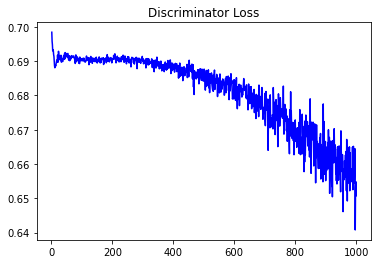

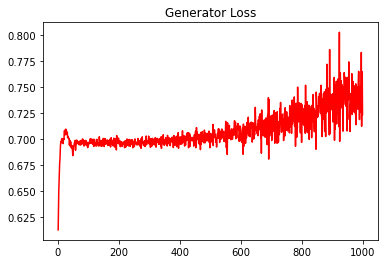

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.4575053019960178


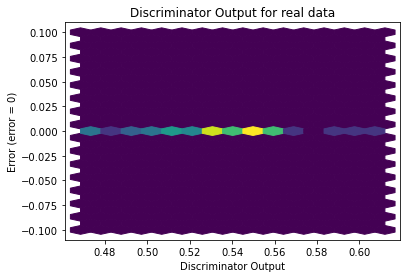

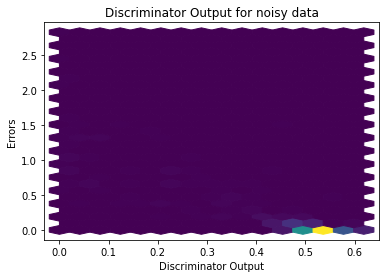

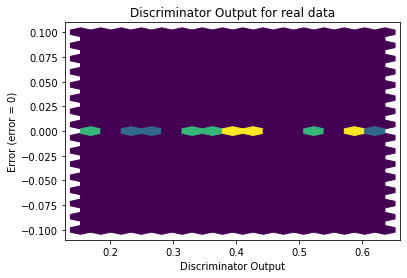

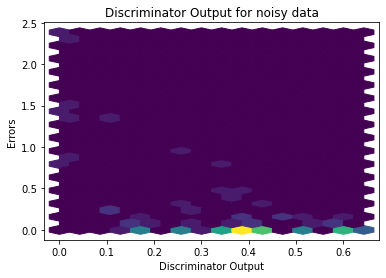

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3285]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0694]], requires_grad=True)
